In [159]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("miketaylor123/sales-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sales-data


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import kagglehub

In [161]:
df = pd.read_csv('/kaggle/input/sales-data/sales_06_FY2020-21 copy.csv')
df.head(15)

/tmp/ipykernel_31/2322813495.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/sales-data/sales_06_FY2020-21 copy.csv')


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.00000,1798.00000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.00000,190.00000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.00000,1199.20000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.00000,639.20000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.00000,99.90000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
5,100367357,2020-11-13,received,595186.0,MEFBUY59B7C3DDC2CA3-42,2.0,39.9,39.9,0.00000,39.90000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
6,100367360,2020-11-13,order_refunded,595192.0,MATDAN59C3C845B38F0,2.0,47.6,47.6,0.00000,47.60000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
7,100354677,2020-10-01,canceled,574769.0,GFE_19_USBLEDLight,2.0,49.0,49.0,0.00000,49.00000,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000
8,100354677,2020-10-01,canceled,574770.0,oasis_Kingston-32GB-DTIG4,2.0,135.0,135.0,0.00000,135.00000,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000
9,100354677,2020-10-01,canceled,574771.0,Geepas_GSB5420,2.0,549.9,549.9,0.00000,549.90000,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000


In [162]:
df.shape

(286392, 36)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [164]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [165]:
df.duplicated().sum()

0

In [166]:
df.drop_duplicates(inplace = True)

In [167]:
df.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [168]:
#Fill missing values with median values for numeric columns.

df.fillna(df.median(numeric_only = True), inplace = True)

In [169]:
#Convert the Date column to datetime format for time series analysis.
#This conversion is essential for accurate time series modeling and analysis, such as trend analysis, forecasting, and more.

df['order_date'] = pd.to_datetime(df['order_date'])

In [170]:
df.describe()

,order_date,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,2021-03-12 11:18:32.008715264,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
min,2020-10-01 00:00:00,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,2020-12-24 00:00:00,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,2021-03-16 00:00:00,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,2021-05-18 00:00:00,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,2021-09-30 00:00:00,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000
std,NaN,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100


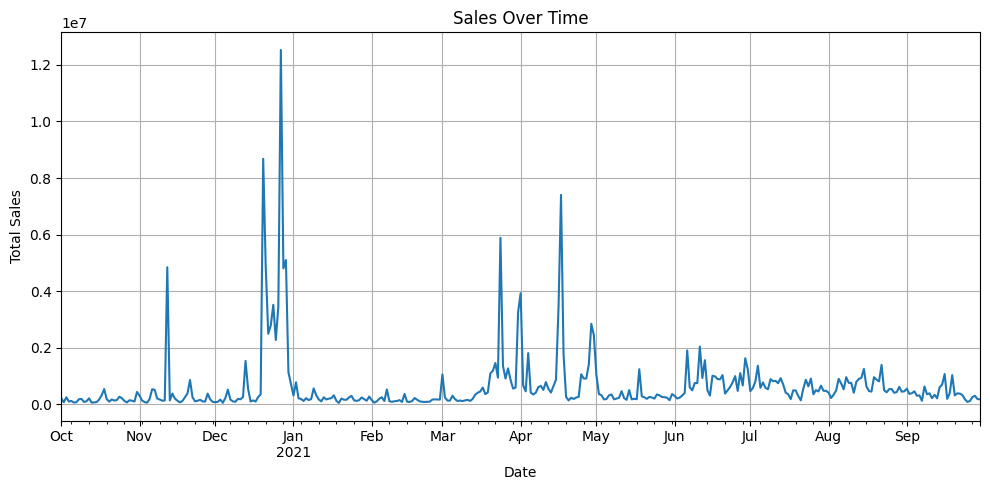

In [171]:
plt.figure(figsize=(10, 5))
df.groupby('order_date')['total'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.tight_layout()
plt.show()

In [172]:
print(df.columns)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')


In [173]:
df['profit'] = df['total'] - df['discount_amount']

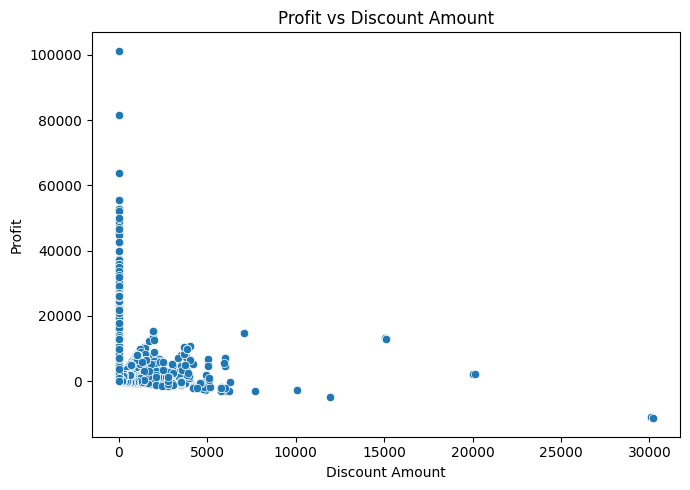

In [174]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='discount_amount', y='profit')
plt.title('Profit vs Discount Amount')
plt.xlabel('Discount Amount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

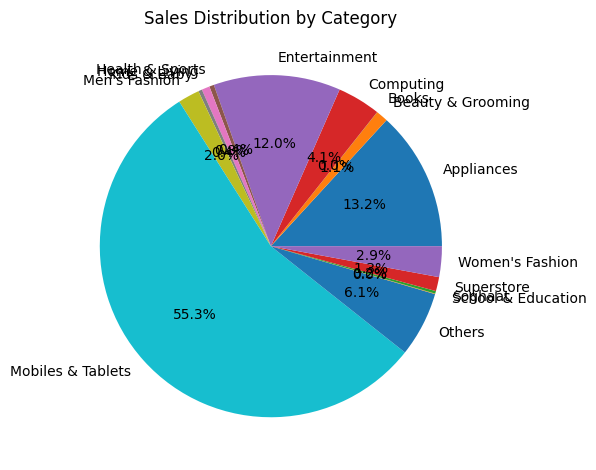

In [175]:
df.groupby('category')['value'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

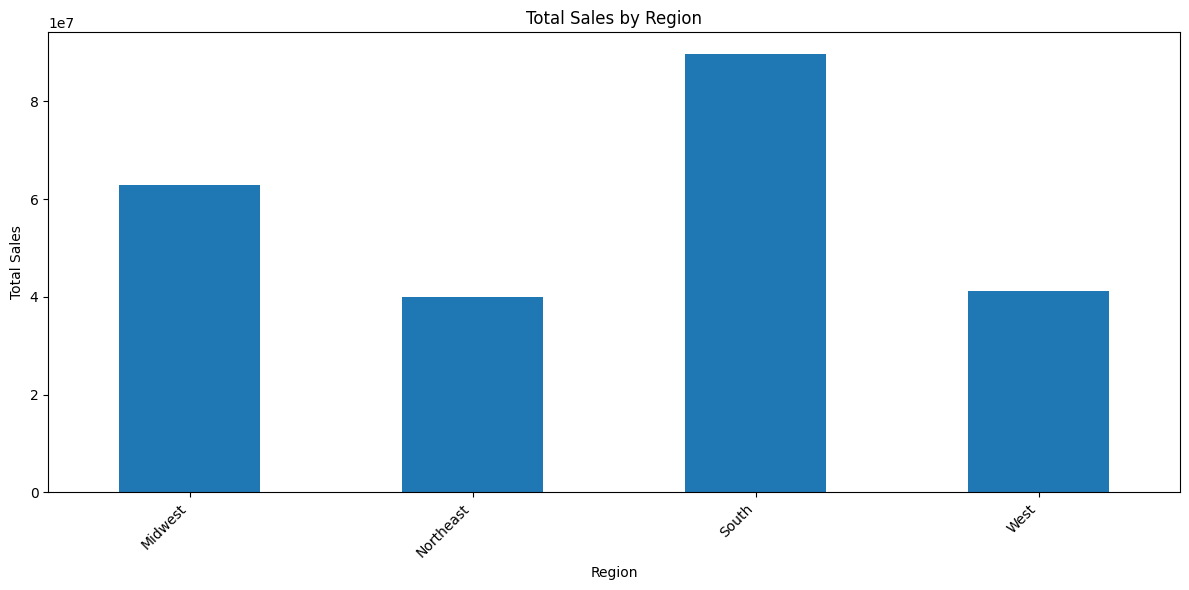

In [176]:
plt.figure(figsize=(12, 6))  # Increase the figure size to make it wider
df.groupby('Region')['total'].sum().plot(kind='bar')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()


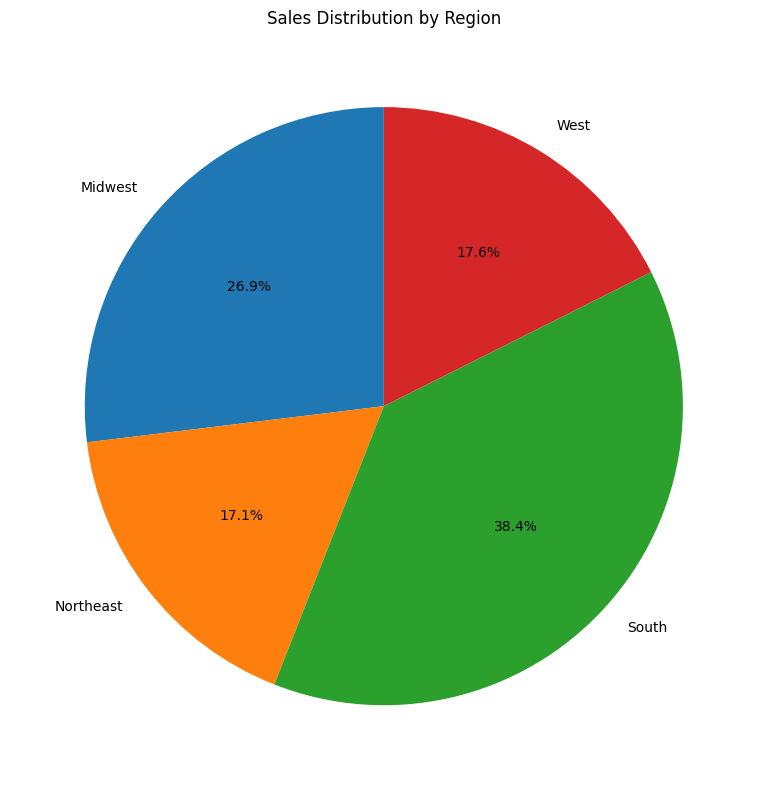

In [177]:
plt.figure(figsize=(8, 8))  # Make the figure square for a better pie chart appearance
df.groupby('Region')['total'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.ylabel('')  # Hide the y-label since it's not needed in a pie chart
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


In [178]:
X = df[['value', 'discount_amount']]
y = df['total']

In [179]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [180]:
y_pred = linear_model.predict(X)

In [181]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R2 Score : ", r2)
print("Mean Squared Error : ", mse)

R2 Score :  1.0
Mean Squared Error :  4.137336386373018e-26


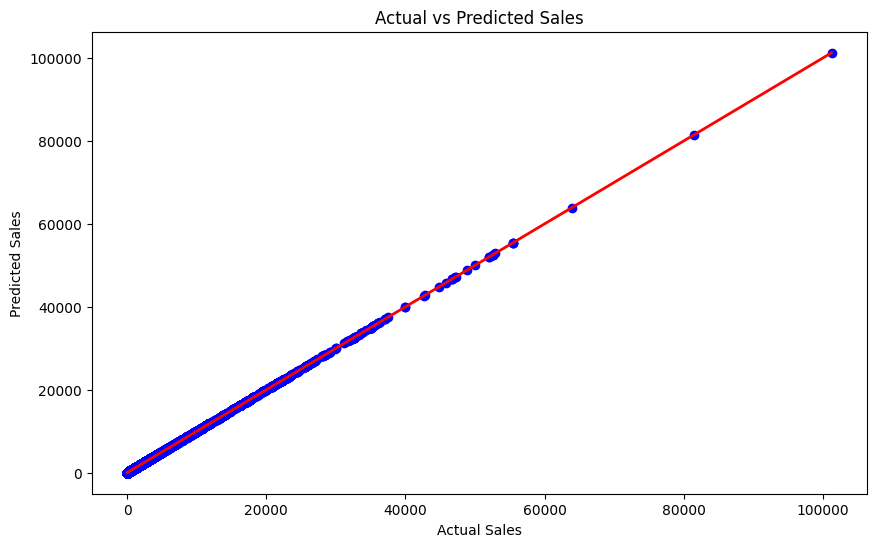

In [182]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2)  # Line showing perfect predictions
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()